In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as scs
import gc 

from importlib import reload
%matplotlib inline

import base
import utility

# 1. USD/JPY Pair 2000-2018_Feb

In [2]:
if True:
    # Import USD/JPY hourly data
    data = pd.read_csv('fx_data/USDJPY/USDJPY_2000-201802_hour.csv', header=0)
    data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)

In [3]:
ta = None
r_periods = [1, 2, 6, 24, 120, 240, 480, 2400]
ta = base.TechnicalAnalysisCase(data)
ta.add_returns(r_periods)

In [4]:
ta.data.describe()

,open,high,low,close,-1P_return,+1P_return,-2P_return,+2P_return,-6P_return,+6P_return,-24P_return,+24P_return,-120P_return,+120P_return,-240P_return,+240P_return,-480P_return,+480P_return,-2400P_return,+2400P_return
count,96779.000000,96779.000000,96779.000000,96779.000000,96778.000000,96778.000000,96777.000000,96777.000000,96773.000000,96773.000000,96755.000000,96755.000000,96659.000000,96659.000000,96539.000000,96539.000000,96299.000000,96299.000000,94379.000000,94379.000000
mean,105.657949,105.756236,105.557918,105.657920,0.000096,0.000096,0.000183,0.000183,0.000499,0.000499,0.001763,0.001763,0.011230,0.011230,0.026330,0.026330,0.053255,0.053255,0.302960,0.302960
std,13.708467,13.717602,13.699986,13.708467,0.141047,0.141047,0.198202,0.198202,0.337196,0.337196,0.670326,0.670326,1.467076,1.467076,2.065359,2.065359,2.943702,2.943702,6.933715,6.933715
min,75.630000,75.750000,75.560000,75.630000,-3.633239,-3.633239,-4.128362,-4.128362,-5.610477,-5.610477,-5.968468,-5.968468,-9.665428,-9.665428,-9.000874,-9.000874,-13.555514,-13.555514,-20.012811,-20.012811
25%,97.366500,97.500500,97.248500,97.369000,-0.060412,-0.060412,-0.086562,-0.086562,-0.161160,-0.161160,-0.370543,-0.370543,-0.884811,-0.884811,-1.297994,-1.297994,-1.809768,-1.809768,-4.189397,-4.189397
50%,108.490000,108.610000,108.384000,108.490000,0.000000,0.000000,0.000000,0.000000,0.001799,0.001799,0.007817,0.007817,0.027506,0.027506,-0.020086,-0.020086,-0.011952,-0.011952,-0.157189,-0.157189
75%,117.190000,117.300000,117.090000,117.190000,0.063473,0.063473,0.090293,0.090293,0.164426,0.164426,0.384999,0.384999,0.929501,0.929501,1.313391,1.313391,1.872675,1.872675,4.139479,4.139479
max,134.900000,135.400000,134.750000,134.900000,3.794790,3.794790,4.707127,4.707127,4.953765,4.953765,6.408458,6.408458,7.699902,7.699902,9.621175,9.621175,12.835803,12.835803,24.331778,24.331778


In [5]:
del data
gc.collect()

792

## Overall Price Movment during the whole period

Range: 75.56 ~ 135.40


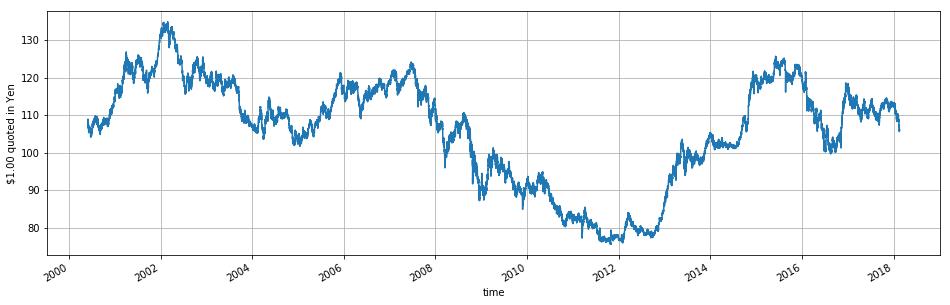

In [6]:
df = ta.data.iloc[:, :5].set_index('time')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
df['close'].plot(ax=ax)
ax.set_ylabel('$1.00 quoted in Yen')
ax.grid(True)

max_price = np.max(df['high'])
min_price = np.min(df['low'])
print('Range: %.2f ~ %.2f' % (min_price, max_price))

Overall, USD/JPY traded between 75-135 during this period of ~17 years. It appears there are both upward and downward trends in a medium term (~a few years). 

## Check the distribution of returns for a given period

In this analysis, trailing returns (i.e. returns up to th current timepoint) and the future returns from the current timepoint) were examined. Their distributions were visually examined and checked for normality.

In [7]:
plus_labels = [col for col in ta.data.columns if 'return' in col and '+' in col]
minus_labels = [col for col in ta.data.columns if 'return' in col and '-' in col]
return_labels = minus_labels + plus_labels
print(plus_labels)
print(minus_labels)

['+1P_return', '+2P_return', '+6P_return', '+24P_return', '+120P_return', '+240P_return', '+480P_return', '+2400P_return']
['-1P_return', '-2P_return', '-6P_return', '-24P_return', '-120P_return', '-240P_return', '-480P_return', '-2400P_return']


### Try fitting to normal distribution

===== Basic Stats for +1P_return  =====
# of observations:	96778
Range:			-3.633% ~ 3.795%
Average:			0.000% +/- 0.141
Normality p-val	0.000
Kurtosis:			33.785
Skewness:		-0.502
===== Basic Stats for +2P_return  =====
# of observations:	96777
Range:			-4.128% ~ 4.707%
Average:			0.000% +/- 0.198
Normality p-val	0.000
Kurtosis:			25.640
Skewness:		-0.343
===== Basic Stats for +6P_return  =====
# of observations:	96773
Range:			-5.610% ~ 4.954%
Average:			0.000% +/- 0.337
Normality p-val	0.000
Kurtosis:			13.681
Skewness:		-0.143
===== Basic Stats for +24P_return  =====
# of observations:	96755
Range:			-5.968% ~ 6.408%
Average:			0.002% +/- 0.670
Normality p-val	0.000
Kurtosis:			6.119
Skewness:		-0.099
===== Basic Stats for +120P_return  =====
# of observations:	96659
Range:			-9.665% ~ 7.700%
Average:			0.011% +/- 1.467
Normality p-val	0.000
Kurtosis:			4.369
Skewness:		-0.097
===== Basic Stats for +240P_return  =====
# of observations:	96539
Range:			-9.001% ~ 9.621%
Average:			0.026

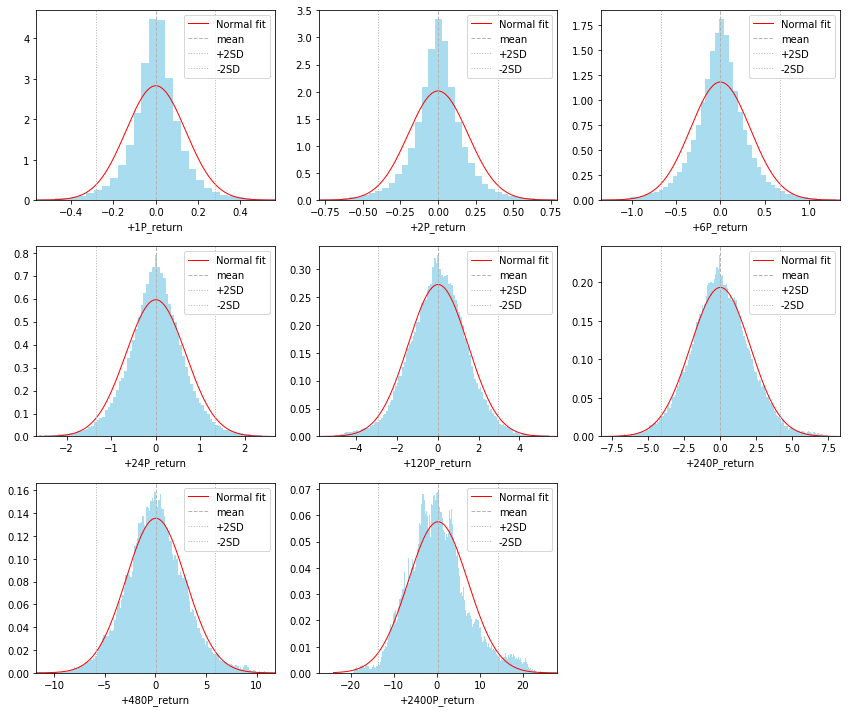

In [8]:
fig = plt.figure(figsize=(12, 10))
for i, label in enumerate(plus_labels):
    series =  np.array(ta.data[label].dropna())
    
    _, pval = scs.normaltest(series)
    nobs, minmax, mean, var, skewness, kurtosis = scs.describe(series)
    std = math.sqrt(var)
    minimum = minmax[0]
    maximum = minmax[1]
    
    print('='*5, 'Basic Stats for %s ' % label, '='*5)
    print('# of observations:\t%d' % nobs)
    print('Range:\t\t\t%.3f%% ~ %.3f%%' % (minimum, maximum))
    print('Average:\t\t\t%.3f%% +/- %.3f' % (mean, std))
    print('Normality p-val\t%.3f' % pval)
    print('Kurtosis:\t\t\t%.3f' % (kurtosis+3))
    print('Skewness:\t\t%.3f' % skewness)
    
    
    m, s = scs.norm.fit(series)
    rv = scs.norm(loc=m, scale=s)
    x_min = 1.2*np.min(series)
    x_max = 1.2*np.max(series)
    x = np.linspace(x_min, x_max, 5000)
    
    ax = fig.add_subplot(3, 3, i+1)
    ax.hist(series, bins=200, density=1, color='skyblue', alpha=0.7, label='')
    ax.plot(x, rv.pdf(x), 'k-', lw=1, color='red', label='Normal fit')
    
    ax.axvline(m, ls='--', lw=1, color='0.7', label='mean')
    ax.axvline(m+2*s, ls=':', lw=1, color='0.7', label='+2SD')
    ax.axvline(m-2*s, ls=':', lw=1, color='0.7', label='-2SD')
    ax.set_xlabel('%s' % label)
    ax.set_xlim([mean-4*std, mean+4*std])
    ax.legend()
plt.tight_layout()

So the shorter the time frame, the higher the kurtosis, but as the time frame gets bigger, the distribution approaches normality.

### Try fitting to t-distribution with df=10

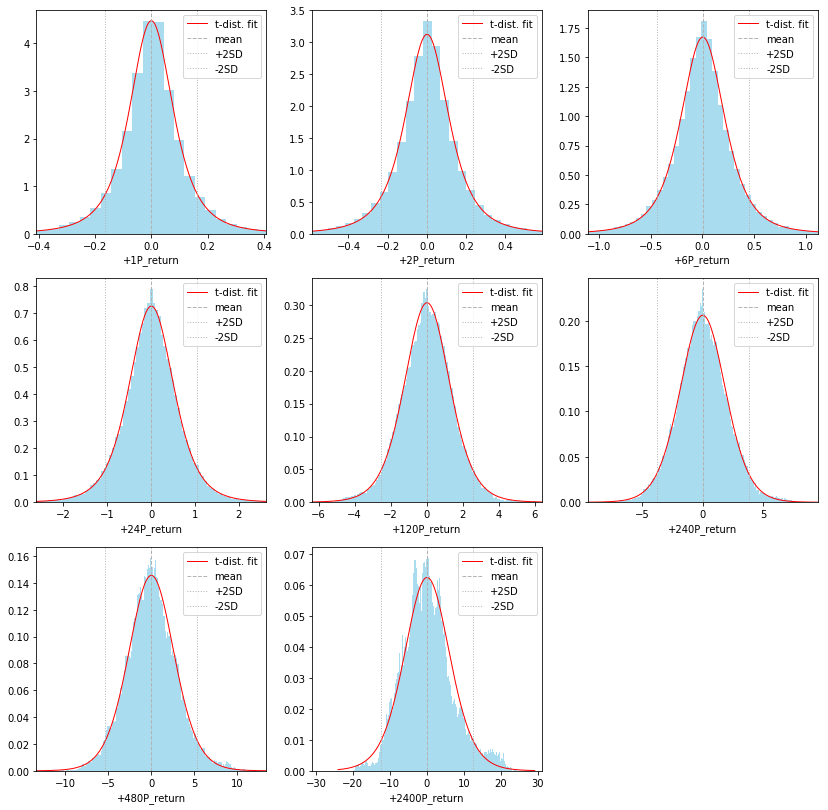

In [9]:
fig = plt.figure(figsize=(14, 14))
for i, label in enumerate(plus_labels):
    series = np.array(ta.data[label].dropna())

    df, mean, std = scs.t.fit(series, 10)
    rv = scs.t(df, loc=mean, scale=std)
    x_min = 1.2*np.min(series)
    x_max = 1.2*np.max(series)
    x = np.linspace(x_min, x_max, 5000)
    
    ax = fig.add_subplot(3, 3, i+1)
    ax.hist(series, density=1, bins=200, color='skyblue', alpha=0.7)
    ax.plot(x, rv.pdf(x), 'k-', lw=1, color='red', label='t-dist. fit')
    
    ax.axvline(mean, ls='--', lw=1, color='0.7', label='mean')
    ax.axvline(mean+2*std, ls=':', lw=1, color='0.7', label='+2SD')
    ax.axvline(mean-2*std, ls=':', lw=1, color='0.7', label='-2SD')
    ax.set_xlabel('%s' % label)
    ax.set_xlim([mean-5*std, mean+5*std])
    ax.legend()

In [10]:
for i, label in enumerate(plus_labels):
    series =  ta.data[label].dropna()
    
    _, pval_norm = scs.kstest(np.array(series), 'norm')
    _, pval_logistic = scs.kstest(np.array(series), 'logistic')
    _, pval_hyp = scs.kstest(np.array(series), 'hypsecant')
    _, pval_laplace = scs.kstest(np.array(series), 'laplace')
    
    print('='*5, 'Kolmogorov-Smirnov Test %s ' % label, '='*5)
    print('Normal Distribution:\t\t\tp-val = %f' % pval_norm)
    print('Logistic Distribution:\t\t\tp-val = %f' % pval_logistic)
    print('Hyperbolic Secant Distribution:\tp-val = %f' % pval_hyp)
    print('Laplace Distribution:\t\t\tp-val = %f' % pval_laplace)

===== Kolmogorov-Smirnov Test +1P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +2P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +6P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +24P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +120P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-va

t-distribution apperas to fit well

## Assessing auto-correlation by visualization

Here I'm assessing if there is any correlation between trailing and future returns. This is an informal test for auto-correlation, where whether the past performance for a given period is any predicitive of the future performance for a given period. Auto-correlation should be formally tested with autoregressive models (AR, etc)

Evaluate if trailing returns (returns up to a timepoint) correlate with future returns (return from a timepoint). The former is indicated with '-' sign and the latter with '+' in the DataFrame labels. In this notebook, 1, 2, and 6 hours, as well as 1, 5, 10, 20, and 100 day returns of both kinds were tracked. Trailing returns are scattered against future returns and Pearson's correlations were calculated.

CPU times: user 12.6 s, sys: 7.72 s, total: 20.3 s
Wall time: 9.7 s


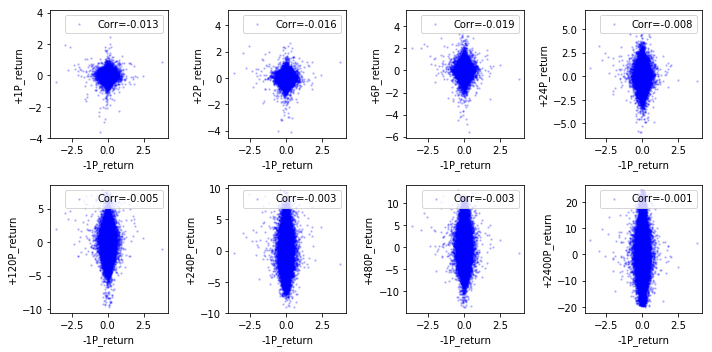

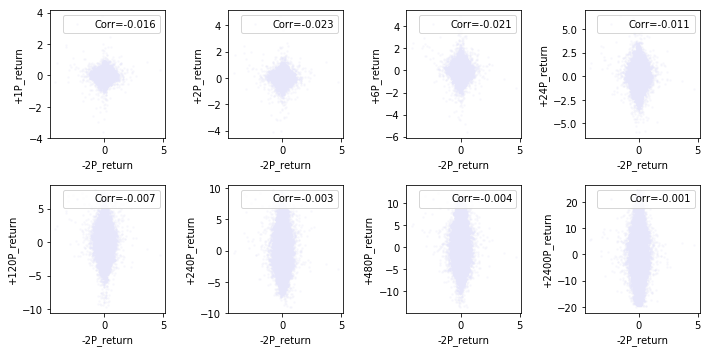

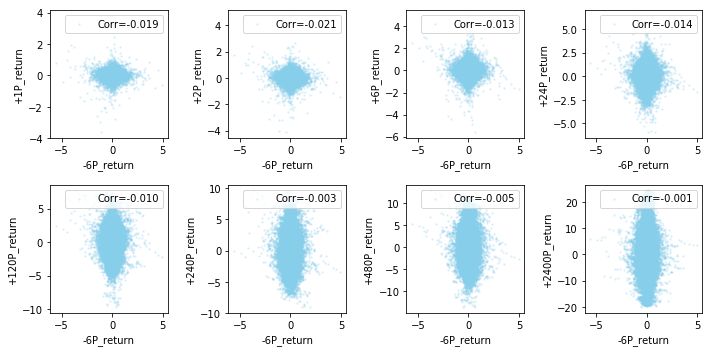

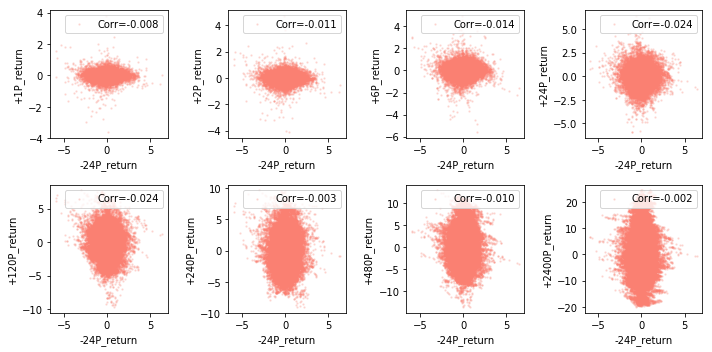

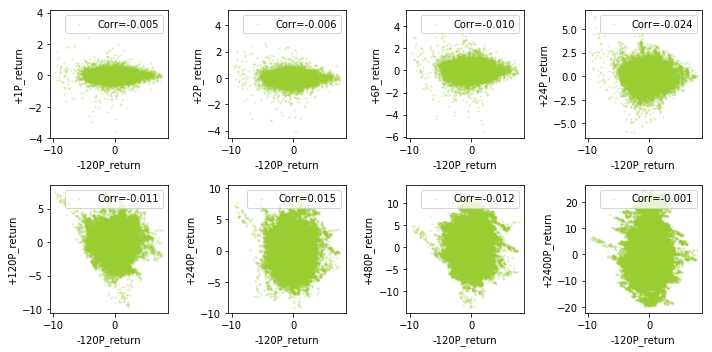

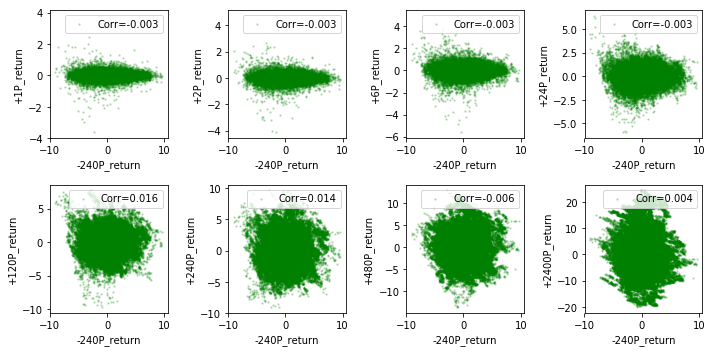

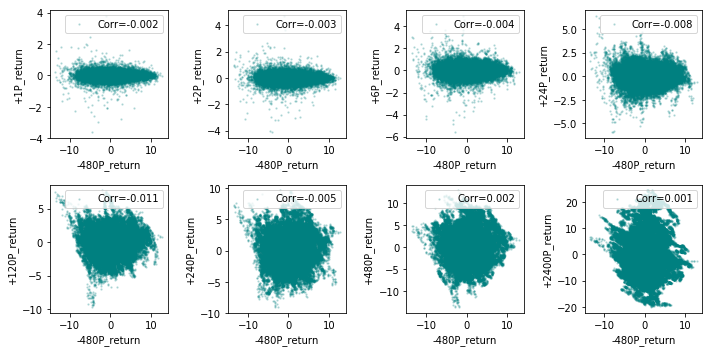

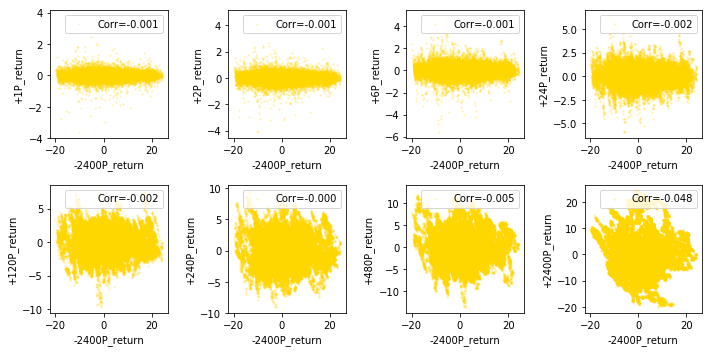

In [11]:
%%time
colors = ['blue', 'lavender', 'skyblue', 'salmon', 'yellowgreen', 'green', 'teal', 'gold']
for i, minus_r in enumerate(minus_labels):
    fig = plt.figure(figsize=(10, 5))
    for j, plus_r in enumerate(plus_labels):
        ax = fig.add_subplot(2, 4, j+1)
        pearson = ta.data[minus_r].corr(ta.data[plus_r])
        ax.scatter(ta.data[minus_r], ta.data[plus_r], color=colors[i], s=2, alpha=0.2, label=('Corr=%.3f' % pearson))
        ax.set_xlabel(minus_r)
        ax.set_ylabel(plus_r)
        ax.legend(loc='upper right')
    plt.tight_layout()

It appears that overall, trends do not persist. So trend up to a point does not correlate with trend from that point for both short and longer periods. Auto-correlations are examined further in EDA03 notebook

In [12]:
%%time
### THIS ONE TAKES A LONG TIME TO COMPLETE SO RUN WHEN NECESSARY
if False:
    cmaps = ['Blues', 'Reds', 'Greens', 'Purples', 'Oranges', 'Greys', 'YlOrRd', 'PuBu']
    for i, minus_r in enumerate(minus_labels):
        print('%d-Processing %s...' % (i+1, minus_r))
        fig = plt.figure(figsize=(12, 6))
        for j, plus_r in enumerate(plus_labels):
            print('\t%dProcessing %s...' % (j+1, plus_r))
            ax = fig.add_subplot(2, 4, j+1)
            df = pd.concat([ta.data[minus_r], ta.data[plus_r]], axis=1).dropna()
            sns.kdeplot(df.iloc[:, 0], df.iloc[:, 1], bw='silverman', cmap=cmaps[i], ax=ax)
            ax.set_xlabel(minus_r)
            ax.set_ylabel(plus_r)
            pearson = ta.data[minus_r].corr(ta.data[plus_r])
            ax.set_title('Pearson\'s Correlation=%.3f' % pearson)
        plt.tight_layout()

CPU times: user 8 µs, sys: 5 µs, total: 13 µs
Wall time: 6.91 µs


There appears to be some substructures based on the kde plots, especially for longer term returns. It'd be interesting to see what conditions those different peaks in density correspond to.